#### # Logistic Regression
 
 Below is the implementation of the logistic regression machine learning model using Scikit-learn module.

# Dataset

The dataset used for implementation is Benchmark dataset for keystroke dynamics analysis from CMU.Write describtion about dataset here. 

# Import modules

1)pandas for creating dataframe and holding data in it. we can explore the data with predefined functions in pandas.
2)numpy for functions used for performing computations on vectors(1 dimensional array) or multi-dimensional arrays.
2)seaborn and matplotlib for data visualization, plotting graphs. 
3)sklearn is contains machine learning modules.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Load and explore data

In [10]:
data = pd.read_csv("Final_data50-50.csv")

In [27]:
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [28]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

# Data Visualization

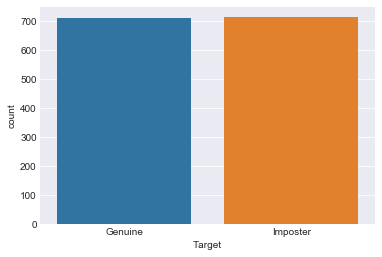

In [29]:
sns.set_style('darkgrid')
sns.countplot(x='Target',data=data)

# Split data into train and test data

In [47]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

# Create logistic regression model and train it with training data

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predict results 

In [49]:
pred = logmodel.predict(X_test)

In [50]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values

In [51]:
df

,Target,Predictions,Genuine probability,Imposter probability
240,Genuine,Genuine,0.863,0.137
119,Genuine,Genuine,0.879,0.121
1281,Imposter,Imposter,0.006,0.994
503,Genuine,Genuine,0.913,0.087
467,Genuine,Genuine,0.831,0.169
336,Genuine,Genuine,0.807,0.193
687,Genuine,Genuine,0.587,0.413
774,Imposter,Imposter,0.019,0.981
1337,Imposter,Imposter,0.010,0.990
423,Genuine,Genuine,0.858,0.142


# Check Performance of Model

**Accuracy**

In [52]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [53]:
y_test.value_counts()

Genuine     144
Imposter    141
Name: Target, dtype: int64

In [56]:
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[137   7]
 [ 10 131]]


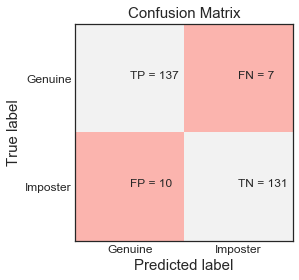

In [57]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

 ***Basic Terminology***
 
 ***True Positive (TP) : ***  We correctly predicted the user is Geninue
 
 ***True Negative (TN) : ***  We correctly predicted the user is Imposter
 
 ***False Positive (FP) : ***  We incorrectly predicted the user is geninue

 ***False Negative (FN) : ***  We incorrectly predicted the user is imposter 
 
  

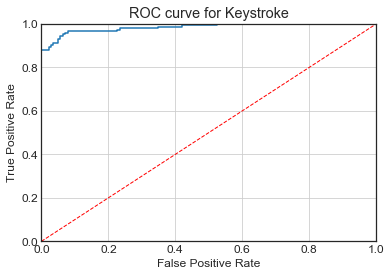

In [58]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [59]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  94.03508771929825

Mis-Classification Rate of Model is:  5.964912280701751

Area Under Curve:  0.9837962962962963


In [60]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.93      0.95      0.94       144
   Imposter       0.95      0.93      0.94       141

avg / total       0.94      0.94      0.94       285



# Parameter Tuning

Check For different random state variable in train_test_split function.

In [104]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    logmodel = LogisticRegression()
    
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 9 Text yticklabel objects>)

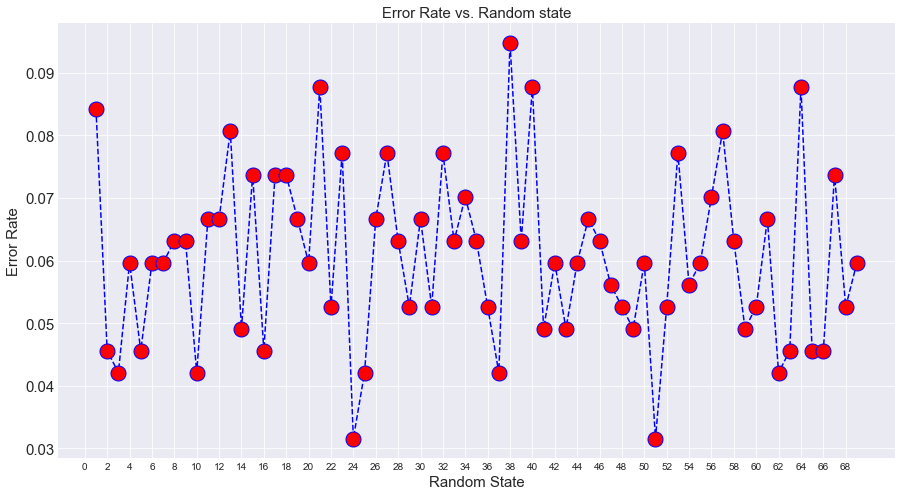

In [112]:
sns.set_style('darkgrid')

ax =plt.figure(figsize=(15,8)).add_subplot(1, 1, 1)
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15,)

plt.title('Error Rate vs. Random state',fontsize=15)
plt.xlabel('Random State',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
major_ticks = np.arange(0, 70, 2)
minor_ticks = np.arange(0, 70, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

**From above graph we can say that error rate is minimum for random state num of 24 **

***Now lets check accuracy for different values of C while creating logistic regression model***

In [113]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:
      
    train, test = train_test_split(data, test_size = 0.2,random_state = 24)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

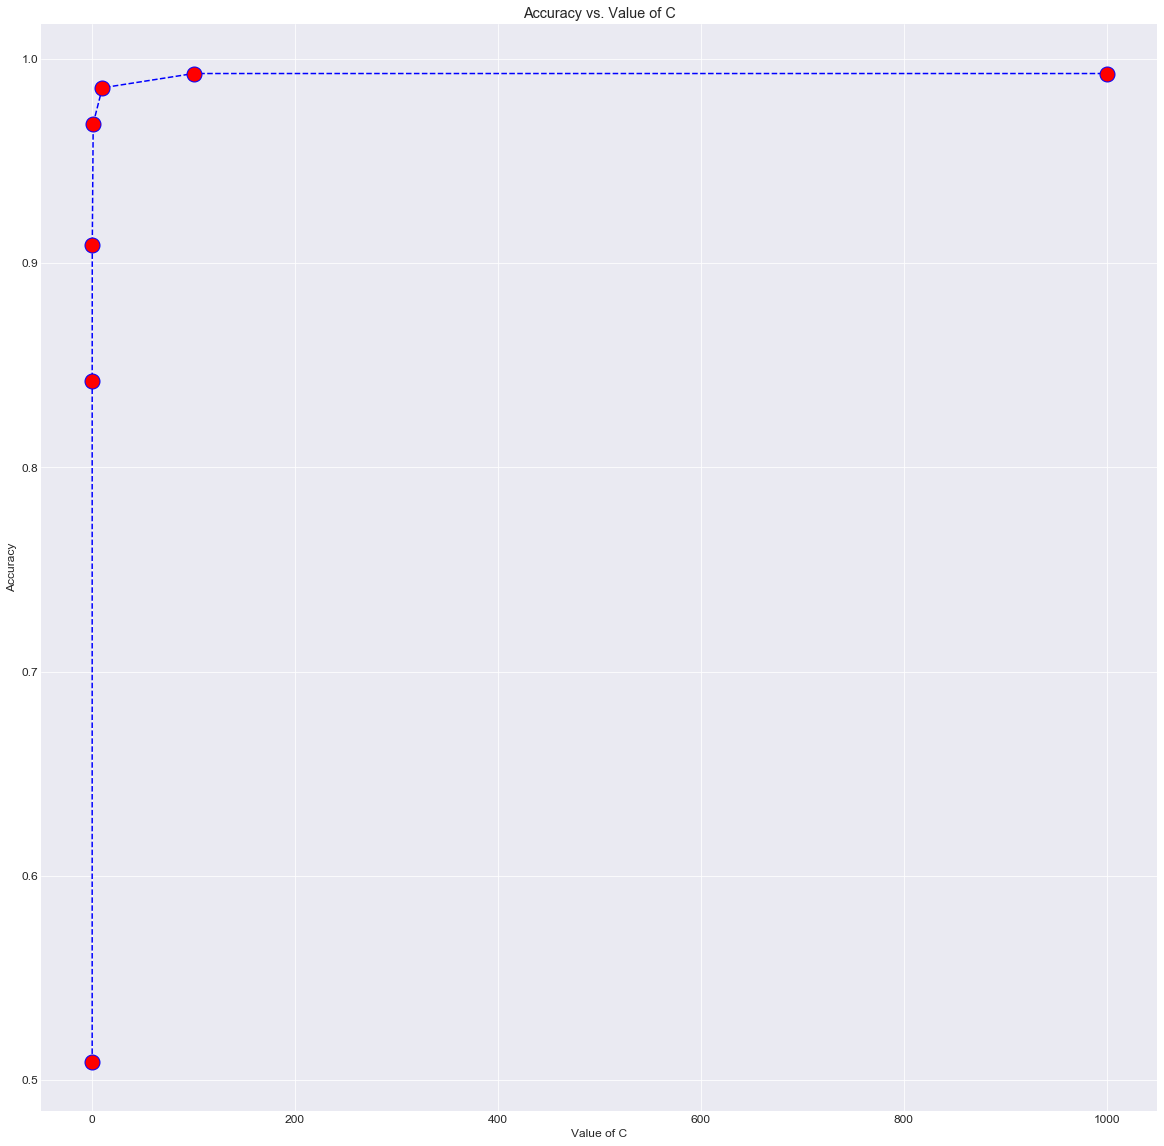

In [114]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [115]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 24)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

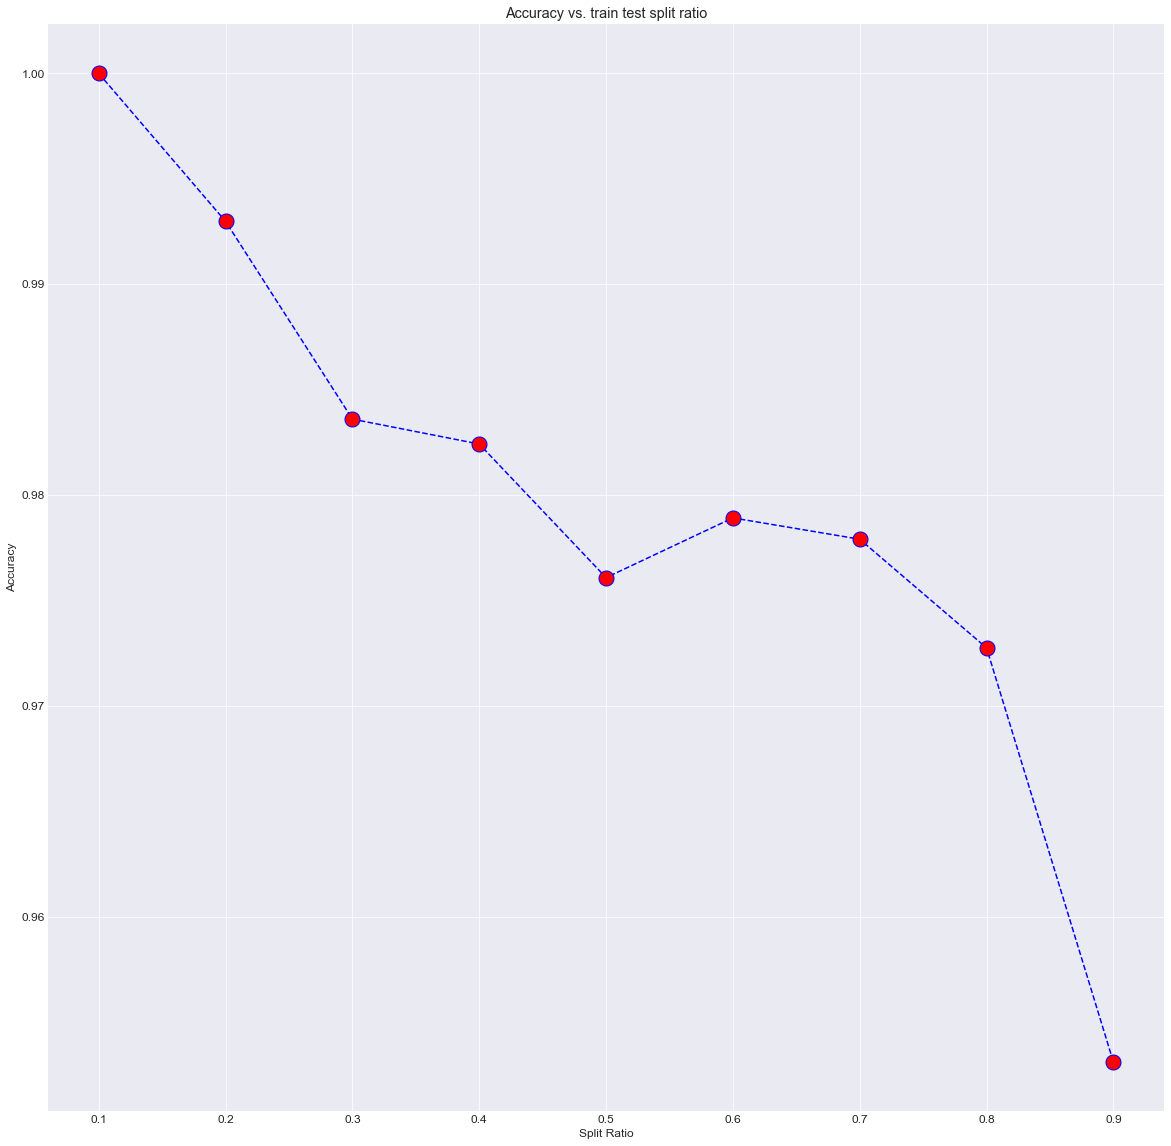

In [116]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

# Performance of model after parameter tuning.

In [117]:
train, test = train_test_split(data, test_size = 0.2, random_state= 24)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[143   0]
 [  2 140]]


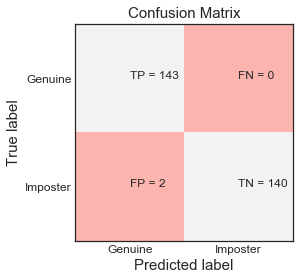

In [118]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Area under curve:  0.9998522604156407


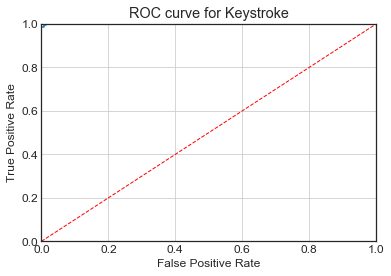

In [119]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)
print("Area under curve: " ,roc_auc)

In [100]:
print("Accuracy of Model is: ",model_accuracy)
print()
print("Mis-Classification Rate of Model is: ",1 - model_accuracy)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  0.9929824561403509

Mis-Classification Rate of Model is:  0.007017543859649145

Area Under Curve:  0.9998522604156407


In [101]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.99      1.00      0.99       143
   Imposter       1.00      0.99      0.99       142

avg / total       0.99      0.99      0.99       285

